In [ ]:
!pip install tensorflow seaborn scikit-learn matplotlib

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time

print("Environment Ready.")

C:\Users\Angch\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Environment Ready.


In [5]:
# Load the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Train Dataset Shape: {x_train.shape}") # 60,000 images
print(f"Test Dataset Shape:  {x_test.shape}")  # 10,000 images

Train Dataset Shape: (60000, 28, 28)
Test Dataset Shape:  (10000, 28, 28)


In [7]:
# Convert 0-255 range to 0.0-1.0 float range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to include the color channel (grayscale = 1)
# This turns (10000, 28, 28) into (10000, 28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Preprocessing complete: Data normalized and reshaped.")

Preprocessing complete: Data normalized and reshaped.


In [11]:
model = models.Sequential([
    # First layer: Detects simple edges/curves
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second layer: Detects more complex shapes
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flattening and Dense layers to make the final "Digit" decision
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2), # Prevents the model from "memorizing" instead of "learning"
    layers.Dense(10, activation='softmax') # Outputs 10 probabilities (0-9)
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Starting Training...")
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Starting Training...
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9280 - loss: 0.2380 - val_accuracy: 0.9843 - val_loss: 0.0569
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9762 - loss: 0.0768 - val_accuracy: 0.9852 - val_loss: 0.0531
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9833 - loss: 0.0559 - val_accuracy: 0.9892 - val_loss: 0.0372
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9858 - loss: 0.0458 - val_accuracy: 0.9893 - val_loss: 0.0346
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9881 - loss: 0.0378 - val_accuracy: 0.9915 - val_loss: 0.0320


In [15]:
# Evaluate on the 10,000 test images
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Recognition Accuracy (Success Rate): {test_acc * 100:.2f}%")
print(f"Target Check (>90%): {'PASSED' if test_acc >= 0.9 else 'FAILED'}")

Recognition Accuracy (Success Rate): 99.06%
Target Check (>90%): PASSED


In [24]:
# Simulate 100 individual inferences
start_time = time.time()
for i in range(100):
    # Predict images one by one to simulate real-time user drawing
    model.predict(x_test[i:i+1], verbose=0)
end_time = time.time()

avg_latency = ((end_time - start_time) / 100) * 1000 # convert to ms
print(f"Average Inference Latency (Simulation): {avg_latency:.2f} ms")
print(f"Goal Check (<50ms): {'PASSED' if avg_latency < 50 else 'FAILED'}")

Average Inference Latency (Simulation): 93.42 ms
Goal Check (<50ms): FAILED


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


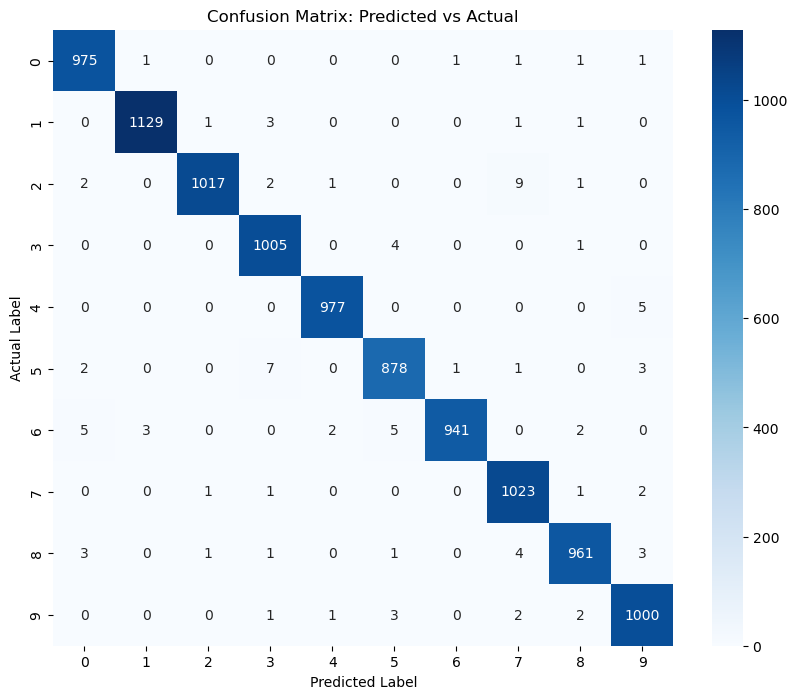

In [17]:
# Get predictions for all test images
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

# Generate Matrix
cm = confusion_matrix(y_test, pred_labels)

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Predicted vs Actual')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [23]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save file to directory
with open('handwritelogic.tflite', 'wb') as f:
    f.write(tflite_model)

print("Success: handwritelogic.tflite exported.")

INFO:tensorflow:Assets written to: C:\Users\Angch\AppData\Local\Temp\tmpluw3xbf8\assets


INFO:tensorflow:Assets written to: C:\Users\Angch\AppData\Local\Temp\tmpluw3xbf8\assets


Saved artifact at 'C:\Users\Angch\AppData\Local\Temp\tmpluw3xbf8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_9')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  3132259982736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3132259983504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3132259984464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3132259983696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3132259984848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3132259984656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3132259985232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3132259985040: TensorSpec(shape=(), dtype=tf.resource, name=None)
Success: handwritelogic.tflite exported.


In [25]:
# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="handwritelogic.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test latency with 100 samples
print("Starting TFLite latency test...")
start_time = time.time()
for i in range(100):
    # Prepare the input data (ensure it is float32)
    input_data = x_test[i:i+1].astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    # Run the optimized inference
    interpreter.invoke()
    
    # Get result (optional, but ensures the operation completes)
    output_data = interpreter.get_tensor(output_details[0]['index'])

end_time = time.time()
real_avg_latency = ((end_time - start_time) / 100) * 1000

print(f"Real TFLite Latency (Optimized): {real_avg_latency:.2f} ms")
print(f"Goal Check (<50ms): {'PASSED' if real_avg_latency < 50 else 'FAILED'}")

Starting TFLite latency test...
Real TFLite Latency (Optimized): 0.14 ms
Goal Check (<50ms): PASSED


C:\Users\Angch\anaconda3\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
